## ***Financial Fraud Analysis***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer  # Import SimpleImputer
from sklearn.ensemble import RandomForestClassifier  # Use RandomForestClassifier




In [2]:
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')

In [3]:
df.head(50)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0.0,0.0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0.0,0.0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0.0,0.0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0.0,0.0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0.0,0.0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0.0,0.0


In [5]:
df.shape

(28297, 11)

In [ ]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
df.describe(include='object')

,type,nameOrig,nameDest
count,28297,28297,28297
unique,5,28297,17076
top,PAYMENT,C1231006815,C985934102
freq,13913,1,71


In [8]:
for col in df.describe(include="object").columns:
    print(col)
    print(df[col].unique())
    print(' _ '*50)

type
['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
nameOrig
['C1231006815' 'C1666544295' 'C1305486145' ... 'C140193335' 'C297851161'
 'C1612091270']
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
nameDest
['M1979787155' 'M2044282225' 'C553264065' ... 'M301121578' 'M1505232216'
 'C345691183']
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 


In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
df.nunique()

step                  8
type                  5
amount            28182
nameOrig          28297
oldbalanceOrg     18645
newbalanceOrig    14860
nameDest          17076
oldbalanceDest    13181
newbalanceDest     3668
isFraud               2
isFlaggedFraud        1
dtype: int64

Question 1:
What is the Median Fraud amount value?

In [ ]:
# Filter for fraudulent transactions
fraud_df = df[df['isFraud'] == 1]

# Calculate the median fraud amount
median_fraud_amount = fraud_df['amount'].median()
print(f"The median fraud amount is: {median_fraud_amount}")


The median fraud amount is: 378688.65


Question 2:
Showcase how many users having more than 1 fraudulent transactions in the given time frame?

In [ ]:
# Assuming you've loaded your dataset into a DataFrame named df
# df = pd.read_csv('path_to_your_dataset.csv')

# Step 1: Filter for fraudulent transactions
fraud_df = df[df['isFraud'] == 1]

# Step 2: Count fraudulent transactions per user
fraud_counts = fraud_df.groupby('nameOrig')['isFraud'].count()

# Step 3: Filter users with more than one fraudulent transaction
multi_fraud_users = fraud_counts[fraud_counts > 1]

# Display the number of such users
print(f"Number of users with more than 1 fraudulent transaction: {len(multi_fraud_users)}")


Number of users with more than 1 fraudulent transaction: 0


Question 3:
Is there a specific time where we see a spike in fraudulent transactions? Show with a graphical chart.

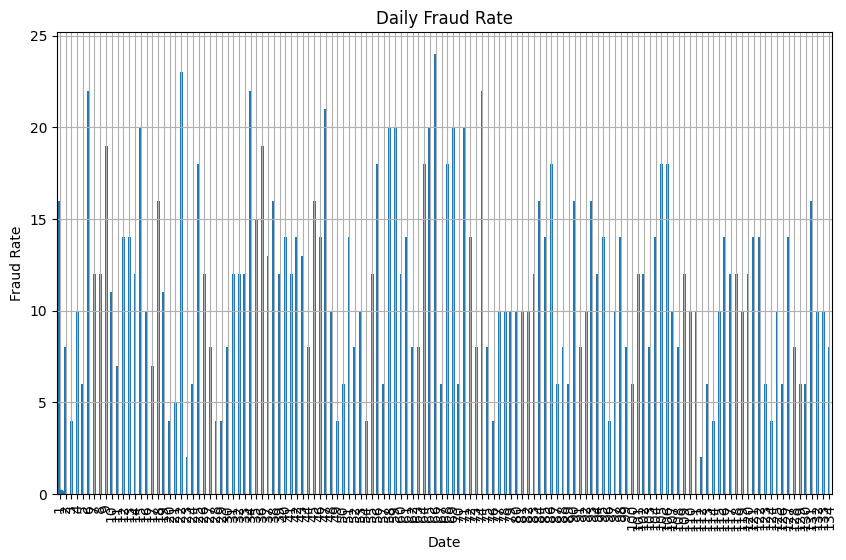

In [ ]:
# Convert the timestamp column to datetime format
df['timestamp'] = pd.to_datetime(df['step'])

# Extract date (day) from the timestamp
df['date'] = df['timestamp'].dt.date

# Group by date and count the total transactions and fraudulent transactions
daily_summary = df.groupby('date').agg({'isFraud': ['count', 'sum']}).reset_index()

# Rename columns for clarity
daily_summary.columns = ['Date', 'Total Transactions', 'Fraudulent Transactions']

# Calculate the fraud rate (fraudulent transactions / total transactions)
daily_summary['Fraud Rate'] = daily_summary['Fraudulent Transactions'] / daily_summary['Total Transactions']

# Calculate fraud by time
fraud_by_time = df.groupby('step')['isFraud'].sum()

# Plot the daily fraud rate
plt.figure(figsize=(10, 6))
fraud_by_time.plot(kind='bar')
plt.plot(daily_summary['Date'], daily_summary['Fraud Rate'], marker='o')
plt.xlabel('Date')
plt.ylabel('Fraud Rate')
plt.title('Daily Fraud Rate')
plt.grid(True)
plt.show()


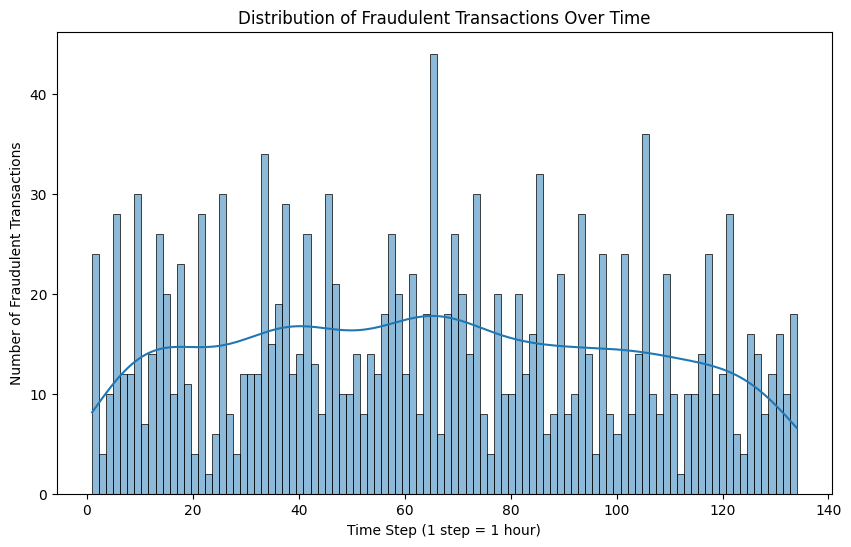

In [ ]:
import seaborn as sns

# Filter the dataset for fraudulent transactions
fraudulent_transactions = df[df['isFraud'] == 1]

# Plot the distribution of fraudulent transactions over time
plt.figure(figsize=(10, 6))
sns.histplot(fraudulent_transactions['step'], bins=100, kde=True)
plt.title('Distribution of Fraudulent Transactions Over Time')
plt.xlabel('Time Step (1 step = 1 hour)')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()


Question 4:
Build a model to predict whether a transaction is fraudulent or not. Use ML only.

In [ ]:
y = df['isFraud']
X=df.drop(['isFraud','type'],axis=1)

object_cols = X.select_dtypes(include=['object', 'datetime']).columns
# Apply Label Encoding to object columns and convert datetime to numerical
label_encoder = LabelEncoder()
for col in object_cols:
    if X[col].dtype == 'object':
        X[col] = label_encoder.fit_transform(X[col])
    elif X[col].dtype == 'datetime64[ns]':  # Handle datetime columns
        X[col] = X[col].astype('int64')  # Convert datetime to Unix timestamp

# Impute missing values (replace NaNs)
imputer = SimpleImputer(strategy='mean')  # Use mean imputation, you can choose other strategies
X = imputer.fit_transform(X)

# Handle missing values in the target variable 'y'
# Here, we'll drop rows with missing values in 'y'
# You can also choose to impute them if it makes sense for your problem
y = y.dropna()  # Drop rows with NaN in 'y'
X = X[y.index]  # Align X with the remaining rows in 'y'

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=59)

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
X_train = pd.DataFrame(X_train) # Use pd.DataFrame to create a DataFrame
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10
0,35.0,227108.44,263365.0,191834.33,418942.77,34917.0,17848.24,354759.67,0.0,35.0,0.0
1,17.0,283890.65,1036220.0,30923.00,314813.65,89699.0,574203.55,290312.90,0.0,17.0,0.0
2,43.0,4979.28,458695.0,32778.00,27798.72,213357.0,0.00,0.00,0.0,43.0,0.0
3,16.0,112625.11,666187.0,0.00,0.00,39869.0,1275018.29,1103920.96,0.0,16.0,0.0
4,16.0,24490.78,616381.0,0.00,0.00,43239.0,350731.42,375222.20,0.0,16.0,0.0


In [ ]:
y_train.head()

655373    0.0
381133    0.0
910750    0.0
344956    0.0
339192    0.0
Name: isFraud, dtype: float64

In [ ]:
X_train.shape

(868074, 11)

In [ ]:
y_train.shape

(868074,)

In [ ]:
# Initialize and train the Random Forest classifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Predictions
predictions = random_forest.predict(X_test)

# Evaluate the model
print(classification_report(y_test, predictions))
print(f"Accuracy: {accuracy_score(y_test, predictions)}")

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    371552
         1.0       0.99      0.73      0.84       480

    accuracy                           1.00    372032
   macro avg       1.00      0.87      0.92    372032
weighted avg       1.00      1.00      1.00    372032

Accuracy: 0.9996505676931017


In [ ]:
df.fillna(method='ffill', inplace=True)

# Print the column names to check
print(df.columns)

# Drop columns that are not needed or could lead to data leakage
# Adjust column names if necessary
df = df.drop(columns=['nameOrig', 'nameDest'])

# Encode the 'type' column
df = pd.get_dummies(df, columns=['type'], drop_first=True)

# Split the data into features and target variable
X = df.drop(columns=['isFraud'])
y = df['isFraud']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'type_CASH_OUT',
       'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')


KeyError: "['nameOrig', 'nameDest'] not found in axis"

In [ ]:
df.fillna(method='ffill', inplace=True)

# Print the column names to check
print(df.columns)

# Drop columns that are not needed or could lead to data leakage
# Adjust column names if necessary
# Check if 'nameOrig' and 'nameDest' are in the columns before dropping
if 'nameOrig' in df.columns and 'nameDest' in df.columns:
    df = df.drop(columns=['nameOrig', 'nameDest'])

# Encode the 'type' column
df = pd.get_dummies(df, columns=['type'], drop_first=True)

# Split the data into features and target variable
X = df.drop(columns=['isFraud'])
y = df['isFraud']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'type_CASH_OUT',
       'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')


KeyError: "None of [Index(['type'], dtype='object')] are in the [columns]"

In [ ]:
df.fillna(method='ffill', inplace=True)

# Print the column names to check if 'type' is present
print(df.columns)

# Drop columns that are not needed or could lead to data leakage
# Adjust column names if necessary
# Check if 'nameOrig' and 'nameDest' are in the columns before dropping
if 'nameOrig' in df.columns and 'nameDest' in df.columns:
    df = df.drop(columns=['nameOrig', 'nameDest'])

# Check if 'type' column exists before encoding
if 'type' in df.columns:
    # Encode the 'type' column
    df = pd.get_dummies(df, columns=['type'], drop_first=True)
else:
    print("Warning: 'type' column not found in DataFrame. Skipping encoding.")

# Split the data into features and target variable
X = df.drop(columns=['isFraud'])
y = df['isFraud']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'type_CASH_OUT',
       'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the model
log_reg_model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
log_reg_model.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg_model.predict(X_test)

In [ ]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.999226733641173
Confusion Matrix:
 [[1270848      56]
 [    928     692]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.93      0.43      0.58      1620

    accuracy                           1.00   1272524
   macro avg       0.96      0.71      0.79   1272524
weighted avg       1.00      1.00      1.00   1272524



In [ ]:
df.fillna(method='ffill', inplace=True)

# Print the column names to check
print(df.columns)

# Check if columns exist before dropping
if 'nameOrig' in df.columns and 'nameDest' in df.columns:
    # Drop columns that are not needed or could lead to data leakage
    # Adjust column names if necessary
    df = df.drop(columns=['nameOrig', 'nameDest'])
    print("Columns 'nameOrig' and 'nameDest' dropped.")
else:
    print("Columns 'nameOrig' and 'nameDest' not found. Skipping.")

# Encode the 'type' column
df = pd.get_dummies(df, columns=['type'], drop_first=True)

# Split the data into features and target variable
X = df.drop(columns=['isFraud'])
y = df['isFraud']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
log_reg_model.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'type_CASH_OUT',
       'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')
Columns 'nameOrig' and 'nameDest' not found. Skipping.


KeyError: "None of [Index(['type'], dtype='object')] are in the [columns]"

In [9]:
X=df.drop(['isFraud','type'],axis=1)

In [10]:
X.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,0.0
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,0.0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0


In [12]:
Y=df['isFraud']

In [13]:
Y.head()

0    0.0
1    0.0
2    1.0
3    1.0
4    0.0
Name: isFraud, dtype: float64

In [14]:
X=pd.get_dummies(X)

In [15]:
X.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,nameOrig_C1000039823,nameOrig_C1000119377,nameOrig_C10001825,...,nameDest_M998964671,nameDest_M998983750,nameDest_M999036382,nameDest_M999095938,nameDest_M999185713,nameDest_M999221400,nameDest_M999421495,nameDest_M999610765,nameDest_M999619421,nameDest_M99985492
0,1,9839.64,170136.0,160296.36,0.0,0.0,0.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,1864.28,21249.0,19384.72,0.0,0.0,0.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,181.00,181.0,0.00,0.0,0.0,0.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,181.00,181.0,0.00,21182.0,0.0,0.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,11668.14,41554.0,29885.86,0.0,0.0,0.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2, random_state=42)

In [17]:
model=RandomForestClassifier()
model.fit(X_train, Y_train)

ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# Handle missing values in X_train
# Option 1: Impute missing values (replace with estimates)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Or other strategies like 'median', 'most_frequent'
X_train_imputed = imputer.fit_transform(X_train)

# Option 2: Remove rows with missing values
X_train_no_nan = X_train.dropna()  # Be mindful of potential data loss

# Now try fitting the model again, using either the imputed or the NaN-free data
model.fit(X_train_imputed, Y_train)  # Or model.fit(X_train_no_nan, Y_train)